# Normalization

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [86]:
def normalize(img):
    lmin = float(img.min())
    lmax = float(img.max())
    return np.floor((img-lmin)/(lmax-lmin)*225.0)

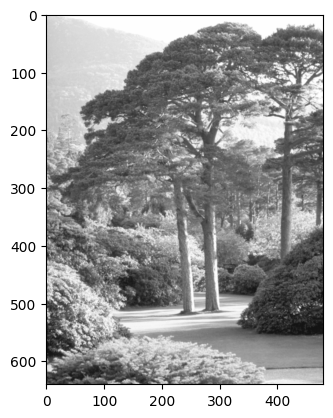

In [87]:
img = plt.imread("foliage.png")
plt.imshow(img,cmap='gray')
plt.savefig('./Photos/img.png')
plt.show()

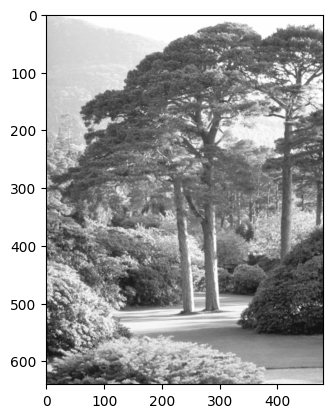

In [88]:
plt.imshow(normalize(img),cmap='gray')
plt.savefig('./Photos/norm_img.png')
plt.show()

In [89]:
print(img-normalize(img))

[[ 3.9215688e-02 -2.2305098e+02 -2.2305098e+02 ... -2.2305098e+02
  -2.2305098e+02 -2.2305098e+02]
 [-2.2305098e+02 -2.2006274e+02 -2.1707451e+02 ... -2.2305098e+02
  -2.2305098e+02 -2.2305098e+02]
 [-2.2305098e+02 -2.0312941e+02 -2.0113725e+02 ... -2.2305098e+02
  -2.2305098e+02 -2.2305098e+02]
 ...
 [-1.5034509e+02 -6.9674507e+01 -6.8678429e+01 ... -1.6926666e+02
  -1.6926666e+02 -1.7225490e+02]
 [-1.7325098e+02 -8.2623528e+01 -7.9635292e+01 ... -1.9814902e+02
  -1.9615686e+02 -2.0113725e+02]
 [-2.0213333e+02 -7.7643135e+01 -8.2623528e+01 ... -2.0512157e+02
  -2.0512157e+02 -2.0810980e+02]]


#Equalization

In [92]:
def equalize(img_filename,save_filename):
        #load file as pillow Image 
        img = Image.open(img_filename)

        # convert to grayscale
        imgray = img.convert(mode='L')

        #convert to NumPy array
        img_array = np.asarray(imgray)

        """
        STEP 1: Normalized cumulative histogram
        """
        #flatten image array and calculate histogram via binning
        histogram_array = np.bincount(img_array.flatten(), minlength=256)

        #normalize
        num_pixels = np.sum(histogram_array)
        histogram_array = histogram_array/num_pixels

        #normalized cumulative histogram
        chistogram_array = np.cumsum(histogram_array)

        """
        STEP 2: Pixel mapping lookup table
        """
        transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

        """
        STEP 3: Transformation
        """
        # flatten image array into 1D list
        img_list = list(img_array.flatten())

        # transform pixel values to equalize
        eq_img_list = [transform_map[p] for p in img_list]

        # reshape and write back into img_array
        eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)


        ######################################
        # WRITE EQUALIZED IMAGE TO FILE
        ######################################
        #convert NumPy array to pillow Image and write to file
        eq_img = Image.fromarray(eq_img_array, mode='L')
        eq_img.save(save_filename)

In [ ]:
equalize('1_mXVbHChSQmsdAmDkuWQIAw.webp','Photos\equ_img.png')